# Business Case: LoanTap Logistic Regression

# Table of Contents
1. [Introduction](#Introduction)
2. [Problem Statement](#Problem_Statement)
   1.  [Definition of problem](#Definition_of_problem)
3. [Summary Statistics](#Summary_Statistics)
    1. [Descriptive Statistics](#Descriptive_Statistics)
    2. [Class Distribution](#Class_Distribution)
    3. [Missing Values](#Missing_Values)    
    4. [Duplicate rows](#Duplicate_rows)
    5. [Outliers](#Outliers)
4. [Data Description](#DataDescription)
5. [Exploratory-Data-Analysis](#Exploratory-Data-Analysis)
    1. [UnivariateAnalysis](#UnivariateAnalysis)    
        1. [loan_amnt](#loan_amnt)
    2. [Correlation](#Correlation)
6. [Data Preprocessing](#Data_Preprocessing)
    1. [Duplicate value check](#Duplicate_value_check)
    2. [Missing value treatment](#[Missing_value_treatment)
    3. [Outlier treatment](#Outlier_treatment)
    4. [Feature engineering](#Feature_engineering)
    5. [Data preparation for modeling](#Data_preparation_for_modeling)
7. [Model building](#Model_building)
    1. [Logistic Regression model](#Logistic_Regression_model)
        1. [model statistics](#model_statistics)
        2. [model coefficients with column names](#model_coefficients_with_column_names)
8. [Results Evaluation](#Results_Evaluation)
9. [ROC AUC Curve](#ROC_AUC_Curve)
    1. [comments](#ROC_AUC_Curve_comments)
10. [Precision Recall Curve](#Precision_Recall_Curve)
    1. [comments](#ROC_AUC_Curve_comments_comments)
11. [Classification Report](#Classification_Report)
    1. [Confusion Matrix](#Confusion_Matrix)
12. [Questions](#Questions)
    1. [Detection of real defaulters and less false positives](#Q1)
    2. [Dealing with NPA and loans disburse](#Q2)
    2. [Actionable Insights & Recommendations](#Q3)
    
    





 



### Introduction

**Context**:

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

- Personal Loan
- EMI Free Loan
- Personal Overdraft
- Advance Salary Loan

This case study will focus on the underwriting process behind Personal Loan only

### Problem_Statement

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab

from scipy.stats import shapiro
import scipy.stats as stats
import scipy.stats as stats
import statsmodels.api as sm

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv("../data/logistic_regression.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

### DataDescription

- **loan_amnt** : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- **term** : The number of payments on the loan. Values are in months and can be either 36 or 60.
- **int_rate** : Interest Rate on the loan
- **installment** : The monthly payment owed by the borrower if the loan originates.
- **grade** : LoanTap assigned loan grade
- **sub_grade** : LoanTap assigned loan subgrade
- **emp_title** :The job title supplied by the Borrower when applying for the loan.*
- **eemp_length** : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
- **home_ownership** : The home ownership status provided by the borrower during registration or obtained from the credit report.
- **annual_inc** : The self-reported annual income provided by the borrower during registration.
- **verification_status** : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
- **issue_d** : The month which the loan was funded

- **purpose** : A category provided by the borrower for the loan request.
- **title** : The loan title provided by the borrower
- **dti** : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
- **earliest_cr_line** :The month the borrower's earliest reported credit line was opened
- **open_acc** : The number of open credit lines in the borrower's credit file.
- **pub_rec** : Number of derogatory public records
- **revol_bal** : Total credit revolving balance
- **revol_util** : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- **total_acc** : The total number of credit lines currently in the borrower's credit file
- **initial_list_status** : The initial listing status of the loan. Possible values are – W, F
- **application_type** : Indicates whether the loan is an individual application or a joint application with two co-borrowers
- **mort_acc** : Number of mortgage accounts.
- **pub_rec_bankruptcies** : Number of public record bankruptcies
- **Address**: Address of the individual
- **loan_status**- : Current status of the loan - Target Variable

<center>
    
| Records | Features |
| :-- | :-- |
| 396030 | 27 |
  
<center>
    
| Class Distribution  | for loan_status |
| :-- | :-- |
| Fully Paid | 80.38 % |
| Charged Off| 19.61 % |
| **highly imbalanced** |



| Id | Features | Description |
| :-- | :--| :--|
|01| **loan_amnt** | numeric|
|02| **term** | Number of months the customer has been with the current telco provider |
|03|**int_rate**|string="area_code_AAA" where AAA = 3 digit area code|


### Summary_Statistics

#### Descriptive_Statistics

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [5]:
df.describe(include='object').T

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


### Class_Distribution

**loan_status**

In [6]:
class_counts = df['loan_status'].value_counts()
class_percentages = df['loan_status'].value_counts(normalize=True) * 100
# Combine counts and percentages into a DataFrame
class_distribution = pd.DataFrame({
    'Count': class_counts,
    'Percentage': class_percentages
})

print(f'Count and percentages of classes are: \n {class_distribution}')


Count and percentages of classes are: 
               Count  Percentage
loan_status                    
Fully Paid   318357   80.387092
Charged Off   77673   19.612908


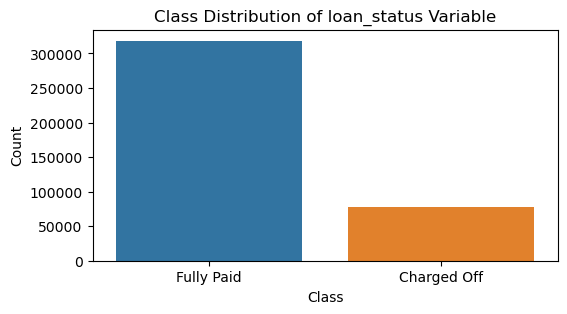

In [7]:
plt.figure(figsize=(6, 3))
sns.countplot(x='loan_status', data=df)
plt.title('Class Distribution of loan_status Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


**Interpretation**

* The target variable 'loan_status' is **imbalanced**, with : 
    * 80.38% of the instances belonging to the **'Fully Paid'** class and 
    * 19.61% to the **'Charged Off'** class.
* This significant class imbalance indicates that models trained on this data might be biased towards predicting the majority class ('Fully Paid').
* **Evaluation Metrics**: metrics that should be used for imbalanced datasets, such as **precision, recall, F1-score, and ROC-AUC, rather than accuracy**.

### Missing_Values

In [8]:
count_missing_values = df.isnull().sum()
per_missing_values = np.round(df.isnull().sum()/len(df) * 100, 2)

df_missing = pd.DataFrame({
    'missingCounts': count_missing_values,
    'missingPercentage': per_missing_values
})
df_missing.sort_values(by = 'missingCounts', ascending=False).head(10)

,missingCounts,missingPercentage
mort_acc,37795,9.54
emp_title,22927,5.79
emp_length,18301,4.62
title,1756,0.44
pub_rec_bankruptcies,535,0.14
revol_util,276,0.07
loan_amnt,0,0.00
dti,0,0.00
application_type,0,0.00
initial_list_status,0,0.00


Text(0.5, 1.0, 'missing % of features values')

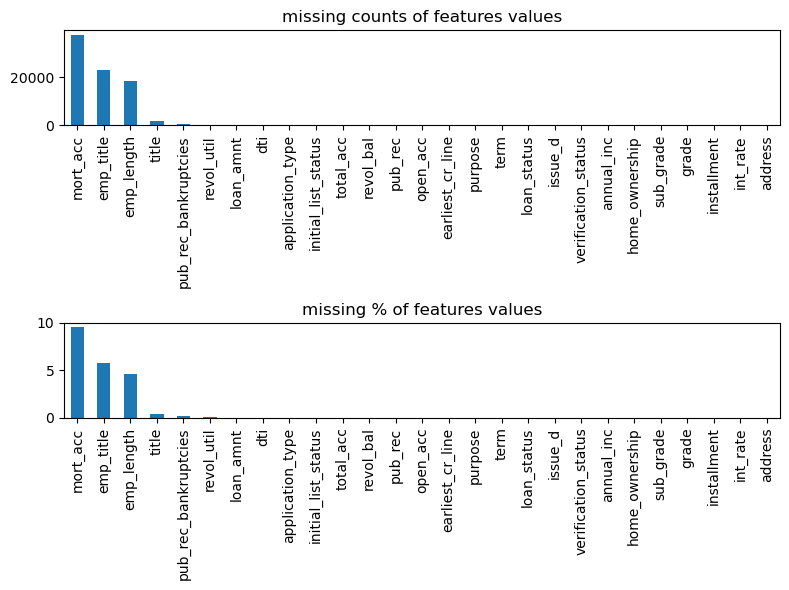

In [9]:
plt.figure(figsize=(8,6), tight_layout=True)
ax1 = plt.subplot(2, 1, 1)
df_missing.sort_values(by='missingCounts', ascending=False)['missingCounts'].plot(kind='bar')
ax1.set_title('missing counts of features values')

ax2 = plt.subplot(2, 1, 2)
df_missing.sort_values(by='missingPercentage', ascending=False)['missingPercentage'].plot(kind='bar')
ax2.set_title('missing % of features values')

**Interpretation**
* Follwing features has % of missing values: 
    * mort_acc		= 9.54
    * emp_title		= 5.79
    * emp_length	= 4.62
    * title	1756	= 0.44
    * pub_rec_bankruptcies	= 	0.14
    * revol_util	= 0.07
    
* Above features needs to be handled during features Engineering using methods like **Mean/Median/Mode Imputation**


### Duplicate_rows

In [10]:
df.duplicated().sum()

0

<font color='blue' size=4>**Interpretation**</color>

* There are no dublicate rows, no handling is required

### Outliers

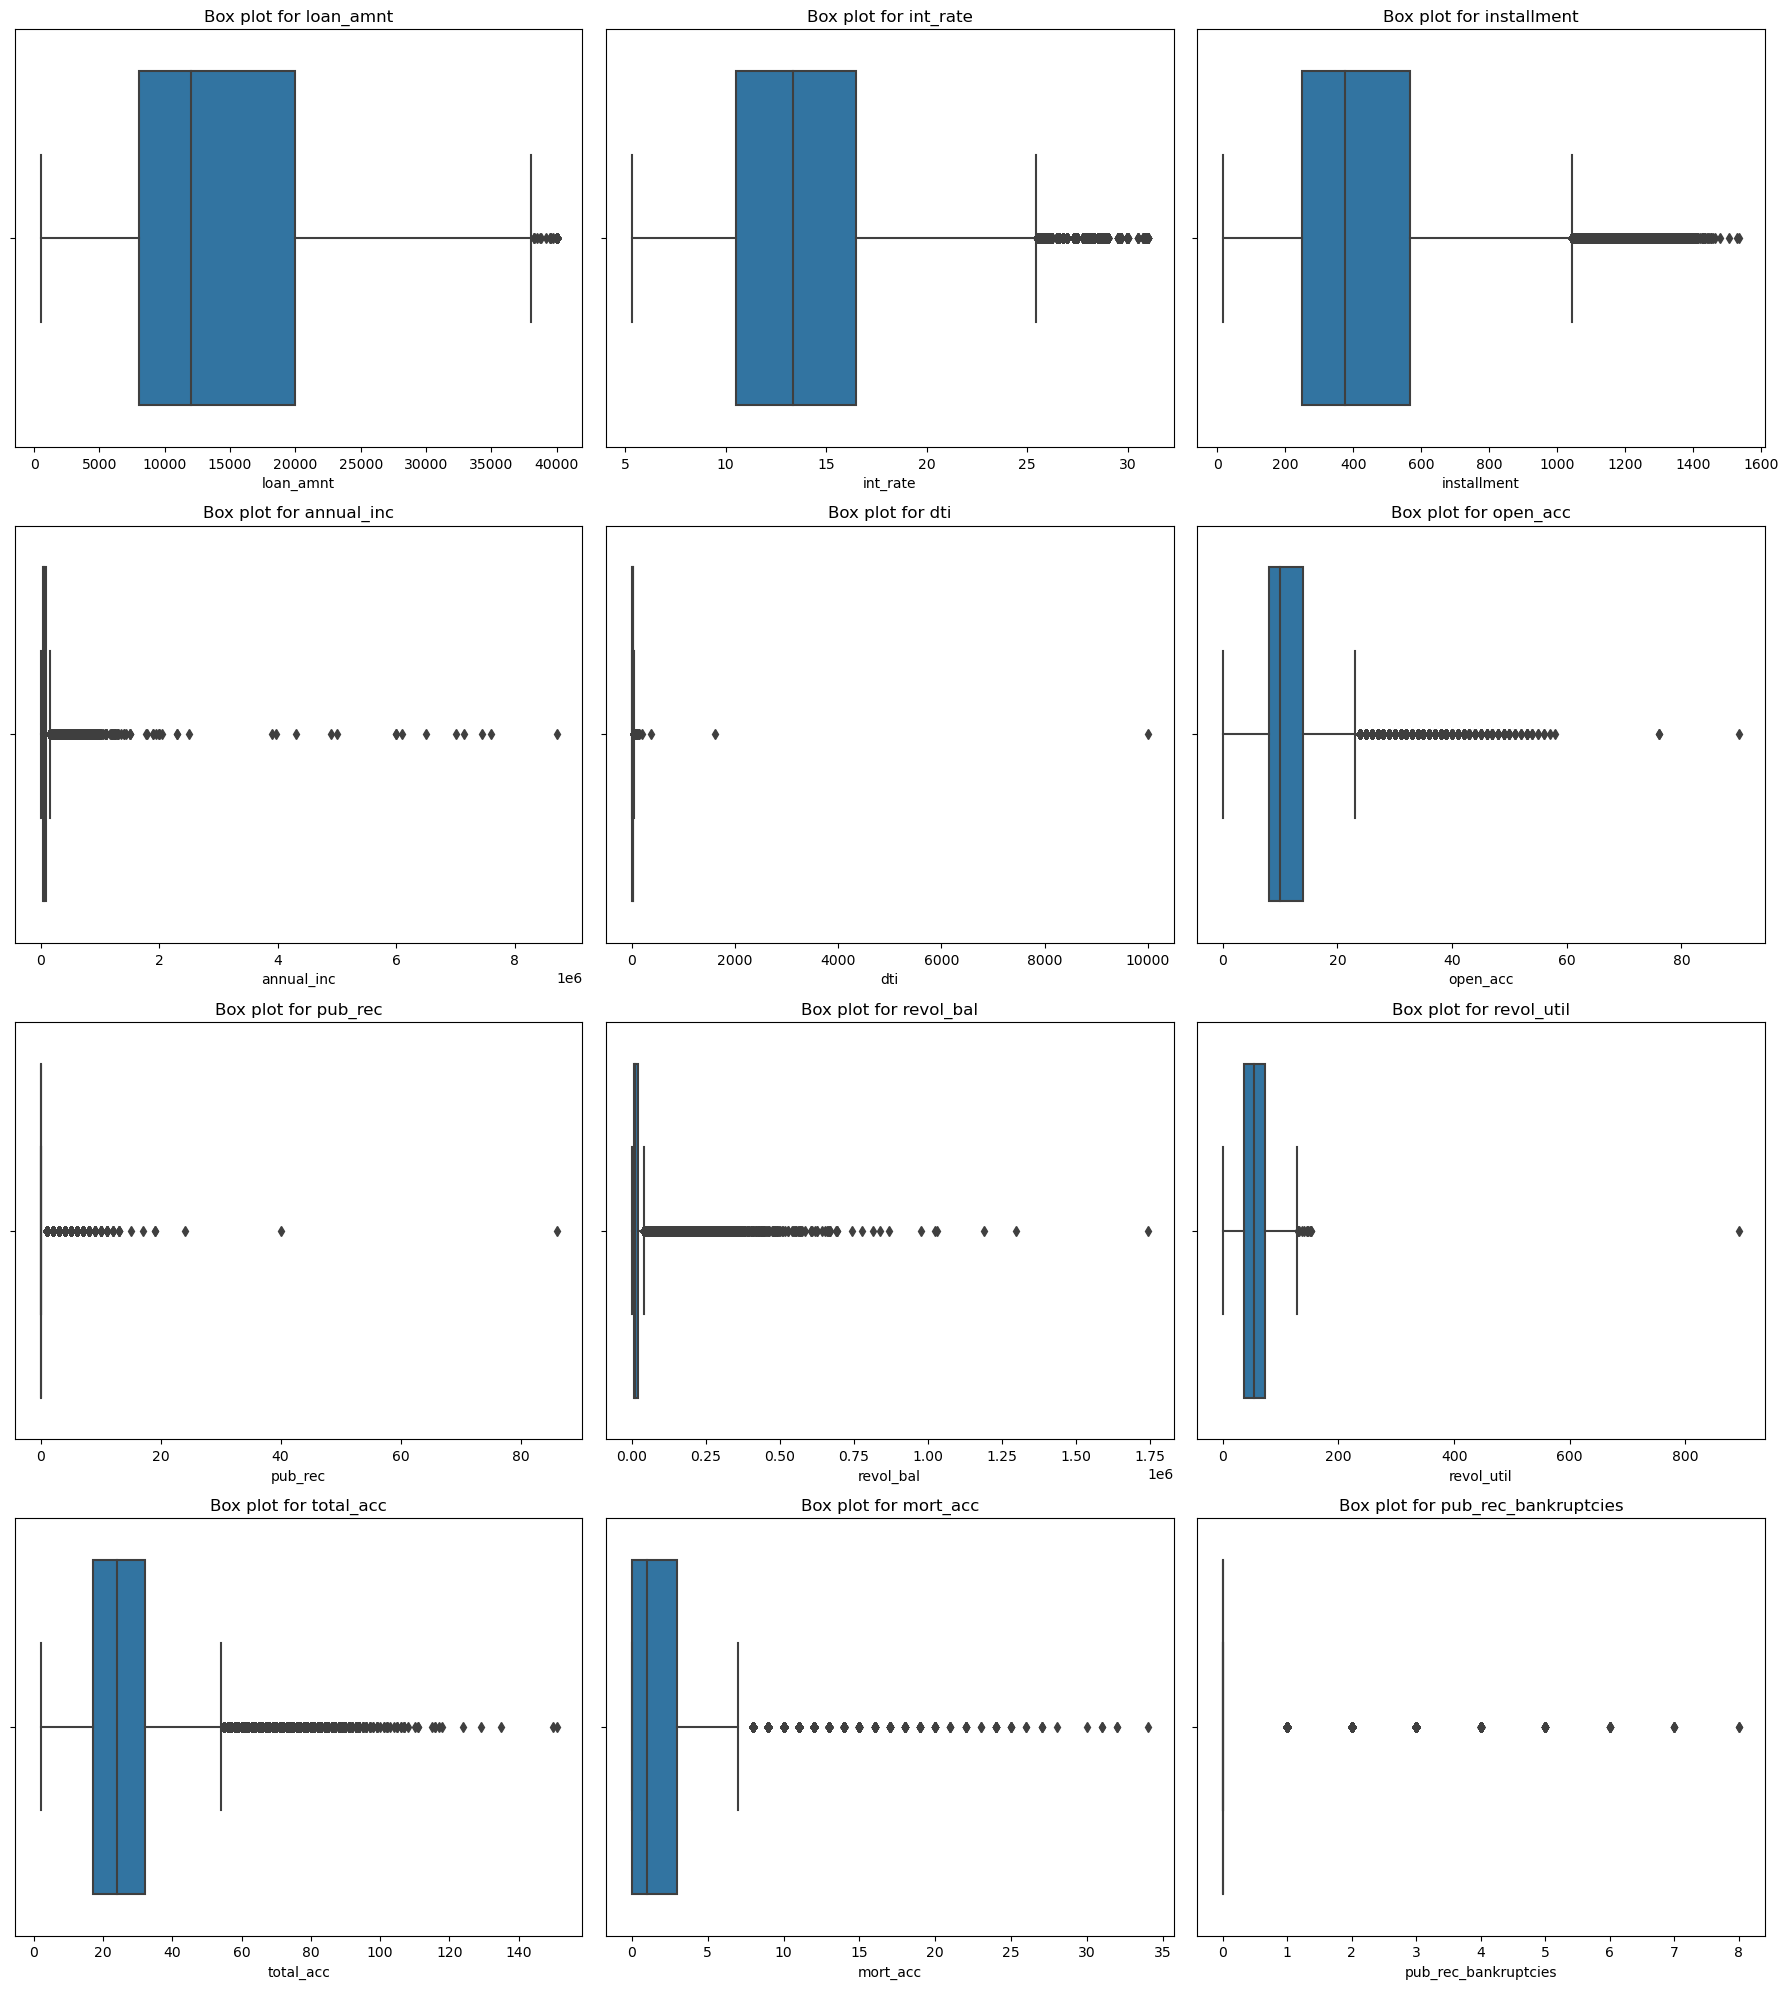

In [11]:
def detect_outliers_with_plots(data):
    """
    Detect outliers in each numerical feature of a dataset using the IQR method and plot box plots as subplots in four rows.
    
    Parameters:
    data (pd.DataFrame): The dataset containing the features.
    
    Returns:
    pd.DataFrame: A DataFrame containing feature names, number of outliers, percentage of outliers, lower and upper boundaries.
    """
    # Calculate the number of numerical features
    numerical_features = [col for col in data.columns if pd.api.types.is_numeric_dtype(data[col])]
    num_features = len(numerical_features)
    
    # Set up the figure and axes for subplots in four rows
    num_rows = 4
    num_cols = (num_features + num_rows - 1) // num_rows  # Calculate number of columns needed
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))  # Adjust figsize as needed
    
    # Initialize a list to store summary statistics
    summary_list = []
    
    # Iterate through numerical features
    for i, feature in enumerate(numerical_features):
        row = i // num_cols
        col = i % num_cols
        
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
        num_outliers = len(outliers)
        total_count = len(data)
        percentage_outliers = (num_outliers / total_count) * 100
        
        # Plot box plot on the corresponding subplot
        sns.boxplot(x=data[feature], ax=axs[row, col])
        axs[row, col].set_title(f'Box plot for {feature}')
        axs[row, col].set_xlabel(feature)
        
        # Append summary statistics to the list
        summary_list.append({
            'Feature': feature,
            'Num_Outliers': num_outliers,
            'Percentage_Outliers': percentage_outliers,
            'Lower_Boundary': lower_bound,
            'Upper_Boundary': upper_bound,
        })
    
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()
    
    # Return summary statistics as a DataFrame
    return pd.DataFrame(summary_list)


# Detect outliers and generate plots
summary_df = detect_outliers_with_plots(df)




In [12]:
# Print the summary DataFrame
df_outliers = summary_df.sort_values(by='Num_Outliers', ascending=False).set_index('Feature')
df_outliers

,Num_Outliers,Percentage_Outliers,Lower_Boundary,Upper_Boundary
Feature,,,,
pub_rec,57758,14.584249,0.000,0.000
pub_rec_bankruptcies,45115,11.391814,0.000,0.000
revol_bal,21259,5.368028,-14367.500,40012.500
annual_inc,16700,4.216852,-22500.000,157500.000
installment,11250,2.840694,-225.125,1042.755
open_acc,10307,2.602581,-1.000,23.000
total_acc,8499,2.146050,-5.500,54.500
mort_acc,6843,1.727899,-4.500,7.500
int_rate,3777,0.953716,1.490,25.490


Text(0.5, 1.0, '% of outliers for features')

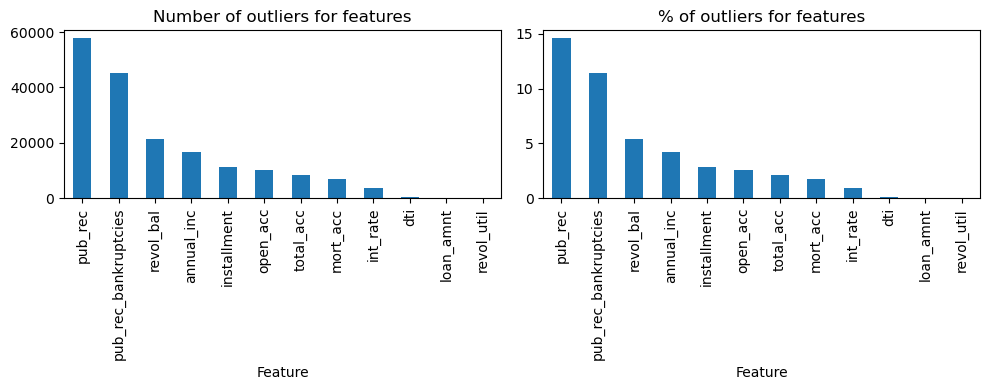

In [13]:
plt.figure(figsize=(10,4), tight_layout=True)
ax1 = plt.subplot(1, 2, 1)
df_outliers['Num_Outliers'].plot(kind='bar')
ax1.set_title('Number of outliers for features')

ax2 = plt.subplot(1, 2, 2)
df_outliers['Percentage_Outliers'].plot(kind='bar')
ax2.set_title('% of outliers for features')

In [14]:
def calculate_summary_statistics(data):
    """
    Calculate and return summary statistics for a numerical feature.
    
    """
    summary_stats = {
        'Mean': np.round(np.mean(data), 2),
        'Median': np.round(np.median(data), 2),
        'Standard Deviation': np.round(np.std(data), 2),
        'Min': np.min(data),
        'Max': np.max(data),
        '25th Percentile': np.percentile(data, 25),
        '75th Percentile': np.percentile(data, 75),
    }
    
    return summary_stats


def skewness_based_on_mean_median(data):
    """
    Calculate skewness based on mean and median.

    """
    mean_val = np.mean(data)
    median_val = np.median(data)
    
    skewness = 3 * (mean_val - median_val) / np.std(data)
    print(f"Skewness based on mean and median: {skewness}")
    
    if skewness > 0:
        print("The distribution is right-skewed.")
    elif skewness < 0:
        print("The distribution is left-skewed.")
    else:
        print("The distribution is approximately symmetric.")
    
    return skewness




In [15]:
def plot_distributions(data , col):
    plt.figure(figsize=(10,2), tight_layout=True)
    plt.subplot(1, 3, 1)
    sns.kdeplot(x=col, data=data)
    plt.title(f'kdeplot for {col}')

    plt.subplot(1, 3, 2)
    sns.boxplot(x=col, data=data)
    plt.title(f'boxplot for {col}')

    ax3 = plt.subplot(1, 3, 3)
    #stats.probplot(data, dist="norm", plot=plt)
    sm.qqplot(data[col], line='s', ax=ax3)  # 's' indicates standardized line
    ax3.set_title(f'qqplot for {col}')
    plt.show()

In [16]:
def test_normality(dataframe, feature, alpha=0.05):

    H0 = f"{feature} is normally distributed"
    H1 = f"{feature} is not normally distributed"    
    
    print(f"H0 : {H0}")
    print(f"H1 : {H1}")
    
    test_statistic, p_value = shapiro(dataframe[feature])
    print(f"Shapiro-Wilk Test Statistic: {test_statistic}")
    print(f"p-value: {p_value}")

    # Interpretation

    print(f"alpha = {alpha}")
    
    if p_value < alpha:
         print(f"Reject the null hypothesis as p_value '{p_value}' <  alpha '{alpha}' (data is not normally distributed).")        
    else:
        print(f"Fail to reject the null hypothesis  as p_value '{p_value}' > alpha '{alpha}' (data is normally distributed).")

In [17]:
def detect_outliers_iqr(data, feature):
    """
    Detect outliers using the Interquartile Range (IQR) method.
    """

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = np.percentile(data[feature], 25)
    Q3 = np.percentile(data[feature], 75)
    
    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Calculate lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers (indices where data is less than lower_bound or greater than upper_bound)
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    
    num_outliers = len(outliers)
    total_count = len(data)
    percentage_outliers = (num_outliers / total_count) * 100
    
    return (num_outliers, np.round(percentage_outliers, 2))


In [22]:
def summary_statistics_and_distribution(data, feature_name):
    print(20*'***') 
    print('summary_statistics:')
    print(20*'***') 
    stats = calculate_summary_statistics(data[feature_name])
    for key, value in stats.items():
        print(f"{key}: {value}")

    print(20*'***')    
    skewness_based_on_mean_median(data[feature_name])
    print(20*'***')  
    
    outliers = detect_outliers_iqr(data, feature_name)
    print(f'outliers : numbers = {outliers[0]} and percentage = {outliers[1]} %')
    print(20*'***')

    plot_distributions(data,feature_name)
    print(20*'***') 
    test_normality(data, feature_name)
    print(20*'***')
    
 

In [19]:
target_variable = 'loan_status'

### loan_amnt

- numberical feature
- right-skewed
- important to keep based on median difference against target variable

************************************************************
summary_statistics:
************************************************************
Mean: 14113.89
Median: 12000.0
Standard Deviation: 8357.43
Min: 500.0
Max: 40000.0
25th Percentile: 8000.0
75th Percentile: 20000.0
************************************************************
Skewness based on mean and median: 0.7588054783263899
The distribution is right-skewed.
************************************************************
outliers : numbers = 191 and percentage = 0.05 %
************************************************************


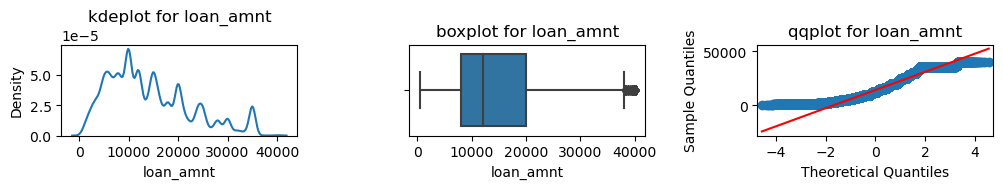

************************************************************
H0 : loan_amnt is normally distributed
H1 : loan_amnt is not normally distributed
Shapiro-Wilk Test Statistic: 0.9392586946487427
p-value: 0.0
alpha = 0.05
Reject the null hypothesis as p_value '0.0' <  alpha '0.05' (data is not normally distributed).
************************************************************


C:\Users\Upendra\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [23]:
feature_name = 'loan_amnt'
summary_statistics_and_distribution(df, feature_name)

Text(0.5, 1.0, 'Distribution of loan_status for loan_amnt')

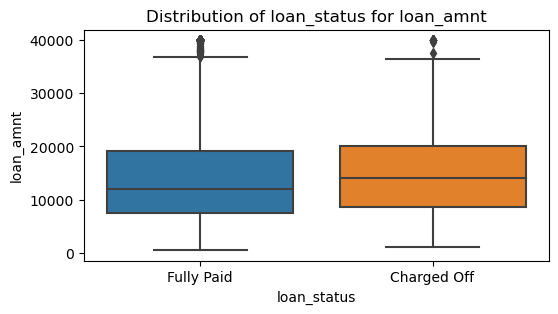

In [28]:
plt.figure(figsize=(6,3))
sns.boxplot(x=target_variable, y =feature_name, data=df)
plt.title(f'Distribution of {target_variable} for {feature_name}')

<font color='blue' size=4>**Interpretation**</color>
- there are notacible difference between the medians for class variables 'fully paid' and 'charged off'
    * So this variable is important
- both class variable has outliers, needs to be checked if to keep these outliers or not ?

### term
- categorical variable

<Axes: xlabel='term'>

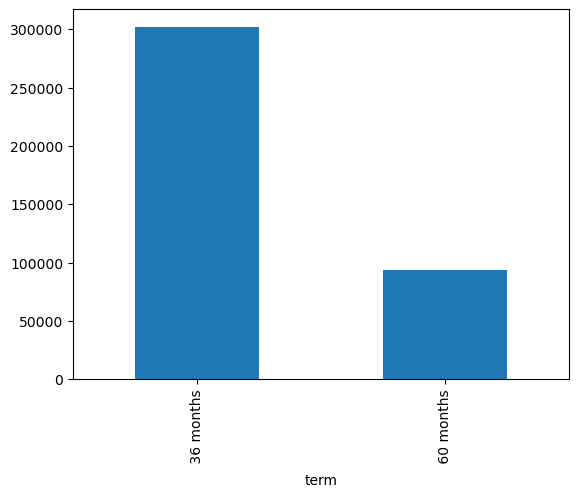

In [35]:
df.term.value_counts().plot(kind='bar')

In [50]:
def chisqare_test(data, predictor, target):

    # Create contingency table
    contingency_table = pd.crosstab(data[predictor], data[target])

    # Perform Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    H0 = "Null Hypothesis (H0): There is no association between {predictor}' and {target}."
    H1 = "Alternate Hypothesis (H1): There is an association between {predictor}' and {target}."
    print (H0)    
    print('Chi-Square test statistic:', chi2)
    print('p-value:', p)

    if p < 0.05:
        print(f'The {predictor} and {target} variable are dependent, {p} < 0.05')
    else:
        print(f'The {predictor} and {target} variable are independent, {p} > 0.05')


In [38]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')